# Import packages

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Read the dataset

In [2]:
df = pd.read_csv("dataset/train.csv", header=None, names=['class_index', 'review_title', 'review_text'])
df.index.name = 'review_id'

In [3]:
df.shape

(3600000, 3)

In [4]:
df.head()

,class_index,review_title,review_text
review_id,,,
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


class_index
2    1800000
1    1800000
Name: count, dtype: int64


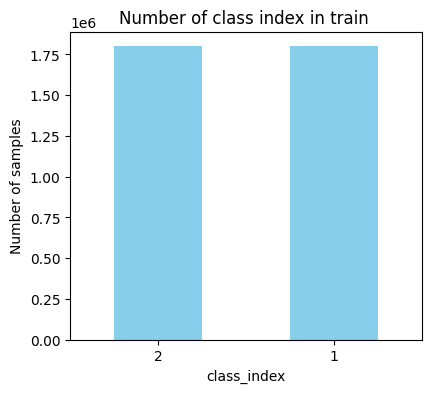

In [5]:
plt.figure(figsize=(10, 4))

train_class_index_counts = df['class_index'].value_counts()
print(train_class_index_counts)
plt.subplot(1, 2, 1)
train_class_index_counts.plot(kind='bar', color='skyblue')
plt.title('Number of class index in train ')
plt.xlabel('class_index')
plt.ylabel('Number of samples')
plt.xticks(rotation=0)


plt.show()

# Detect Missing Values

In [6]:
df[df.isnull().any(axis=1)].info

<bound method DataFrame.info of            class_index review_title  \
review_id                             
13265                1          NaN   
26554                1          NaN   
26827                2          NaN   
36598                2          NaN   
37347                2          NaN   
...                ...          ...   
3403351              1          NaN   
3455848              1          NaN   
3493132              2          NaN   
3565886              1          NaN   
3575894              1          NaN   

                                                 review_text  
review_id                                                     
13265      Couldn't get the device to work with my networ...  
26554      What separates this band from Evanescence (bes...  
26827      Falkenbach returns with more of the Viking/Fol...  
36598      I returned this because I received the same on...  
37347      This book is a great fantasy. I love this amaz...  
...                

### drop the missing values

In [7]:
df = df.dropna(how="any")

In [8]:
df[df.isnull().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   class_index   0 non-null      int64 
 1   review_title  0 non-null      object
 2   review_text   0 non-null      object
dtypes: int64(1), object(2)
memory usage: 0.0+ bytes


In [9]:
df.info

<bound method DataFrame.info of            class_index                                       review_title  \
review_id                                                                   
0                    2                     Stuning even for the non-gamer   
1                    2              The best soundtrack ever to anything.   
2                    2                                           Amazing!   
3                    2                               Excellent Soundtrack   
4                    2  Remember, Pull Your Jaw Off The Floor After He...   
...                ...                                                ...   
3599995              1                                      Don't do it!!   
3599996              1                      Looks nice, low functionality   
3599997              1                         compact, but hard to clean   
3599998              1                                 what is it saying?   
3599999              2              Makes My

In [10]:
df.duplicated().count()

np.int64(3599793)

# Text Cleaning

### Convert Text To Lowercase

In [11]:
df[df['review_title'].str.contains(r'[A-Z]', na=False)].count()

class_index     3154025
review_title    3154025
review_text     3154025
dtype: int64

In [12]:
# Filter rows where 'review_title' contains uppercase letters
uppercase_rows = df[df['review_title'].str.contains(r'[A-Z]', na=False)]

# Convert 'review_title' in those rows to lowercase
df.loc[uppercase_rows.index, 'review_title'] = df.loc[uppercase_rows.index, 'review_title'].str.lower()



In [13]:
df[df['review_title'].str.contains(r'[A-Z]', na=False)].count()

class_index     0
review_title    0
review_text     0
dtype: int64

In [14]:
df[df["review_text"].str.contains(r'[A-Z]', na=False)].count()

class_index     3515499
review_title    3515499
review_text     3515499
dtype: int64

In [15]:
# Filter rows where 'review_text' contains uppercase letters
uppercase_rows = df[df['review_text'].str.contains(r'[A-Z]', na=False)]

# Convert 'review_title' in those rows to lowercase
df.loc[uppercase_rows.index, 'review_text'] = df.loc[uppercase_rows.index, 'review_title'].str.lower()

In [16]:
df[df["review_text"].str.contains(r'[A-Z]', na=False)].count()

class_index     0
review_title    0
review_text     0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3599793 entries, 0 to 3599999
Data columns (total 3 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   class_index   int64 
 1   review_title  object
 2   review_text   object
dtypes: int64(1), object(2)
memory usage: 238.9+ MB


## Get Tokens

In [25]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### work in sample example

In [19]:
# dfCopy = df.head().copy()

# get tokens from review text
df['review_text'] = df['review_text'].apply(lambda x: word_tokenize(x, preserve_line=True))

# get tokens from review title
df['review_title'] = df['review_title'].apply(lambda x: word_tokenize(x, preserve_line=True))

### detect stop words and remove theme

In [28]:
from nltk.corpus import stopwords

In [29]:
stop_words = set(stopwords.words('english'))

# remove stop words from review text
df['review_text'] = df['review_text'].apply(
    lambda x: [
        re.sub(r'[^a-zA-Z0-9]', '', word)  # Remove non-alphanumeric characters
        for word in x if word.lower() not in stop_words
    ]
)

# Remove any empty strings that may have resulted from the re.sub() removal
df['review_text'] = df['review_text'].apply(
    lambda x: [word for word in x if word != '']
)


# remove stop words from review title
df['review_title'] = df['review_title'].apply(
    lambda x: [
        re.sub(r'[^a-zA-Z0-9]', '', word)  # Remove non-alphanumeric characters
        for word in x if word.lower() not in stop_words
    ]
)

# Remove any empty strings that may have resulted from the re.sub() removal
df['review_title'] = df['review_title'].apply(
    lambda x: [word for word in x if word != '']
)

In [32]:
df.sample(5)

,class_index,review_title,review_text
review_id,,,
3564845,1,"[total, junk]","[total, junk]"
2757099,2,"[excellent, tv]","[excellent, tv]"
1955483,2,"[wish, possible, read, back, front]","[wish, possible, read, back, front]"
1581931,2,"[great, average, joe]","[great, average, joe]"
1560035,1,"[selfabsorbed, save, politics]","[selfabsorbed, save, politics]"
